In [1]:
import os
from keras.models import load_model
import numpy as np
import pickle
import cv2
from keras.preprocessing.image import img_to_array


Using TensorFlow backend.


In [2]:
model = load_model('zoeira.model')
lb = pickle.loads(open("lb3.pickle", "rb").read())

In [3]:
os.chdir(r'./Matriz')
labels = os.listdir(".")
print(labels)

['Others', 'Aedes', 'Culex', 'Background']


In [4]:
index = 0
changedLabel = labels
var = labels[0]
changedLabel.pop(0)
changedLabel.append(var)
print(changedLabel)

['Aedes', 'Culex', 'Background', 'Others']


In [ ]:
matrix = np.zeros((len(labels), len(labels)))
for n in changedLabel:
    for x in os.listdir("./"+ n):
        print(x)
        image = cv2.imread(n+'/'+x)
        output = image.copy()

        # pre-process the image for classification
        image = cv2.resize(image, (96, 96))
        image = image.astype("float") / 255.0
        image = img_to_array(image)
        image = np.expand_dims(image, axis=0)
        proba = model.predict(image)[0]
        print(proba)
        idx = np.argmax(proba)
        print("É: " + str(index))
        print("Acusa: " + str(idx))
        label = lb.classes_[idx]
        print("É: " + str(changedLabel[index]))
        print("Acusa: " + str(label))
        print(str(index)+" "+str(idx))
        print('\n')
        
        matrix[index][idx] += 1
    index += 1

Ciclo-Aedes-aegypti-1-1024x673jpg.png
[9.9976093e-01 3.2213356e-06 2.0266812e-05 2.1561146e-04]
É: 0
Acusa: 0
É: Aedes
Acusa: Aedes
0 0


IMG_20180506_105703869_BURST012.jpg
[9.9989402e-01 2.8267821e-05 8.0884682e-08 7.7617944e-05]
É: 0
Acusa: 0
É: Aedes
Acusa: Aedes
0 0


20180506_121130.jpg
[7.8448486e-01 2.0432146e-04 2.7410746e-05 2.1528341e-01]
É: 0
Acusa: 0
É: Aedes
Acusa: Aedes
0 0


3b81d27a90462641ef0503d905c6aa87jpg.png
[9.9994981e-01 2.0177664e-08 3.0086342e-10 5.0178212e-05]
É: 0
Acusa: 0
É: Aedes
Acusa: Aedes
0 0


20180506_120942.jpg
[9.8015666e-01 2.1060082e-04 5.9674323e-05 1.9573027e-02]
É: 0
Acusa: 0
É: Aedes
Acusa: Aedes
0 0


depositphotos_97504540-stock-illustration-nature-aedes-aegypti-mosquito-stiltjpg.png
[9.9328703e-01 2.0665127e-06 4.0974744e-08 6.7108665e-03]
É: 0
Acusa: 0
É: Aedes
Acusa: Aedes
0 0


mayaro-e-mais-um-virus-transmitido-pelo-aedes-aegypti_965503jpg.png
[9.9997282e-01 2.0545283e-08 1.6791809e-06 2.5501868e-05]
É: 0
Acusa: 0
É: Aedes
Acusa: Aedes

No eixo X temos o que o objeto é e no eixo Y temos a predição dele

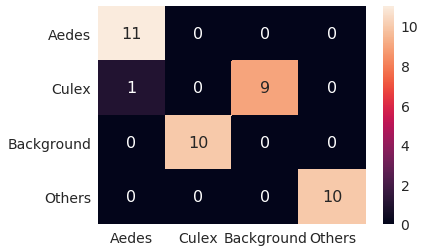

In [7]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
   
df_cm = pd.DataFrame(matrix, changedLabel,
                  changedLabel)
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

In [7]:
print(matrix)

[[11.  0.  0.  0.]
 [ 1.  0.  9.  0.]
 [ 0. 10.  0.  0.]
 [ 0.  0.  0. 10.]]


In [8]:
percmatrix = matrix
index2=0
for n in percmatrix:
    lendirectory = len(os.listdir("./"+changedLabel[index2]))
    line=0
    for m in n:
        percmatrix[index2][line] = (float(m)/float(lendirectory))
        line+=1
    index2 += 1

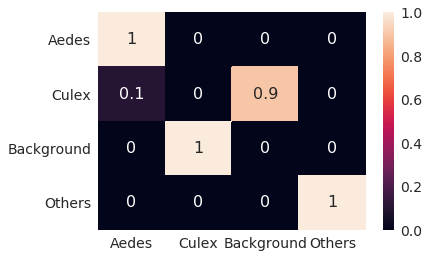

In [9]:
dp_cm = pd.DataFrame(percmatrix, changedLabel,
                  changedLabel)
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(dp_cm, annot=True,annot_kws={"size": 16})# font size